This is the main research notebook of the current project.
See full description in [README.md](https://github.com/mvulf/acm-project/blob/main/README.md)

# Import libraries and setup callbacks

In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.append('../')

from regelum.simulator import CasADi

from regelum.objective import RunningObjective
from regelum.scenario import Scenario, RLScenario

# For MPC only
from regelum.utils import rg
from regelum.predictor import EulerPredictor
from regelum.model import ModelWeightContainer
# Max Iteration count may be added in opt_options={"print_level": 0, "max_iter": MAX_ITER},
from regelum.optimizable.core.configs import CasadiOptimizerConfig
from regelum.critic import CriticTrivial
from regelum.event import Event

from src.system import HydraulicSystem, StationaryHydraulicSystem
from src.observer import StationaryHydraulicObserver
from src.policy import PDController, MPC
from src.objective import HydraulicObjectiveModel


# Callbacks
from regelum.callback import ScenarioStepLogger
from src.callback import HistoricalDataCallback, SimulatorStepLogger
from regelum import set_ipython_env
%matplotlib inline

callbacks = [SimulatorStepLogger, ScenarioStepLogger, HistoricalDataCallback]
ScenarioStepLogger.cooldown = 0.01
callbacks = set_ipython_env(callbacks=callbacks, interactive=True)

# Setup common parameters and objects

In [2]:
MAX_STEP = 1e-7
FINAL_TIME = 10e-3
SAMPLING_TIME = 1e-3

# Define the initial state
p_atm = 1e5
initial_state = rg.array([1e3, 0, 0, p_atm, p_atm])

# SYSTEM and SIMULATOR
system = HydraulicSystem(
    init_state=initial_state
)
simulator = CasADi(
    system=system,
    state_init=initial_state,
    action_init=rg.array([0]),
    time_final=FINAL_TIME,
    max_step=MAX_STEP,
)

# RUNNING OBJECTIVE
running_objective_model = HydraulicObjectiveModel(
    system=system,
    quad_matrix_type="diagonal", weights=[1, 0, 0]
)  # A quadratic model for running (a.k.a. instant) objective
running_objective = RunningObjective(
    model=running_objective_model
)  # Wrap `running_objective_model` into `RunningObjective` class

# Experiments

Below you can find experiments of both PD and MPC controller

## PD-controller

In [3]:
pd_policy = PDController(
    system=system,
    sampling_time=SAMPLING_TIME,
    P_coef=20, # Let us set it exactly as maximum action
)

scenario = Scenario(
    policy=pd_policy,
    simulator=simulator,
    sampling_time=SAMPLING_TIME,
    N_episodes=1,
    N_iterations=1,
    running_objective=running_objective,
)

scenario.run()

[23:07:59] INFO     runn. objective: 3.71, state est.: [0. 0.], observation: [0. 0.], action:      ]8;id=701393;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=317540;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [20.], value: 0.0037, time: 0.0000 (0.0%), episode: 1/1, iteration: 1/1                        

[23:08:09] INFO     runn. objective: 2.92, state est.: [  0.22 432.48], observation: [  0.22       ]8;id=806506;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=779603;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    432.48], action: [17.73], value: 0.0066, time: 0.0010 (10.0%), episode: 1/1,                   
                    iteration: 1/1                                                                                 

[23:08:22] INFO     runn. objective: 1.35, state est.: [  0.77 645.5 ], observation: [  0.77 645.5 ]8;id=538962;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=80613;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    ], action: [12.01], value: 0.0080, time: 0.0020 (20.0%), episode: 1/1,                         
                    iteration: 1/1                                                                                 

[23:08:36] INFO     runn. objective: 0.26, state est.: [  1.41 651.69], observation: [  1.41       ]8;id=230833;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=280306;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    651.69], action: [5.24], value: 0.0082, time: 0.0030 (30.0%), episode: 1/1,                    
                    iteration: 1/1                                                                                 

[23:08:57] INFO     runn. objective: 0.00, state est.: [  1.99 509.32], observation: [  1.99       ]8;id=469944;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=750796;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    509.32], action: [-0.76], value: 0.0082, time: 0.0040 (40.0%), episode: 1/1,                   
                    iteration: 1/1                                                                                 

[23:09:24] INFO     runn. objective: 0.21, state est.: [  2.38 292.82], observation: [  2.38       ]8;id=860924;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=665706;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    292.82], action: [-4.85], value: 0.0085, time: 0.0050 (50.0%), episode: 1/1,                   
                    iteration: 1/1                                                                                 

[23:10:00] INFO     runn. objective: 0.40, state est.: [ 2.56 72.43], observation: [ 2.56 72.43],  ]8;id=987868;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=43529;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.66], value: 0.0088, time: 0.0060 (60.0%), episode: 1/1, iteration:                 
                    1/1                                                                                            

[23:10:39] INFO     runn. objective: 0.41, state est.: [2.57 2.19], observation: [2.57 2.19],      ]8;id=487010;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=377219;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.8], value: 0.0093, time: 0.0070 (70.0%), episode: 1/1, iteration:                  
                    1/1                                                                                            

[23:11:08] INFO     runn. objective: 0.41, state est.: [2.57 1.79], observation: [2.57 1.79],      ]8;id=953430;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=839628;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.81], value: 0.0097, time: 0.0080 (80.0%), episode: 1/1, iteration:                 
                    1/1                                                                                            

[23:11:42] INFO     runn. objective: 0.42, state est.: [2.57 0.94], observation: [2.57 0.94],      ]8;id=511643;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=833228;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.82], value: 0.0101, time: 0.0090 (90.0%), episode: 1/1, iteration:                 
                    1/1                                                                                            

[23:12:15] INFO     runn. objective: 0.42, state est.: [2.57 2.42], observation: [2.57 2.42],      ]8;id=603594;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=412897;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.83], value: 0.0105, time: 0.0100 (100.0%), episode: 1/1,                           
                    iteration: 1/1                                                                                 

Save and display results

,time,running_objective,current_value,episode_id,iteration_id,throttle action [µm],jet length [mm],jet velocity [mm/s]
0,0.000000,3.710643,0.003711,1,1,20.000000,0.000000,0.000000
1,0.001000,2.919688,0.006630,1,1,17.729522,0.217593,432.482033
2,0.002000,1.347538,0.007978,1,1,12.012728,0.765468,645.497731
3,0.003000,0.261897,0.008240,1,1,5.239942,1.414544,651.686718
4,0.004000,0.003986,0.008244,1,1,-0.758744,1.989434,509.320458
5,0.005000,0.207389,0.008451,1,1,-4.851873,2.381703,292.824179
6,0.006000,0.395568,0.008847,1,1,-6.662694,2.555245,72.425823
7,0.007000,0.412569,0.009259,1,1,-6.802238,2.568618,2.192204
8,0.008000,0.413955,0.009673,1,1,-6.813489,2.569697,1.793389
9,0.009000,0.415268,0.010089,1,1,-6.824124,2.570716,0.942401


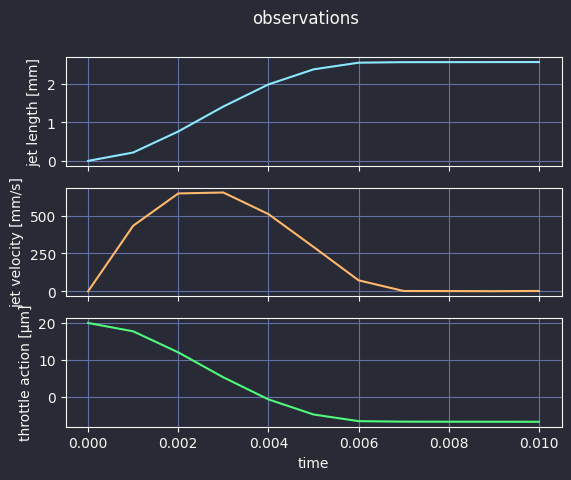

In [4]:
state_trajectory_pd = callbacks[0].data
observations_pd = callbacks[-1].data.iloc[:,:-2]
display(observations_pd)
callbacks[-1].plot(name="observations"); # Replace plot to own plot function!

# Clean callback
callbacks[0].reset()
callbacks[-1].clear_recent_data()

## Model Predictive Control (MPC)

In [5]:
PREDICTION_HORIZON = 5
ACTION_SIZE = 1
PREDICTION_STEP_SIZE = 1 * SAMPLING_TIME

model = ModelWeightContainer(
    dim_output=ACTION_SIZE, 
    weights_init=rg.zeros(
        (PREDICTION_HORIZON + 1, ACTION_SIZE), 
        rc_type=rg.CASADI
    )
)  # A trivial model contains our predicted actions
# System for the predictor
system_model = StationaryHydraulicSystem(
    init_state=initial_state
)
observer = StationaryHydraulicObserver(
    system=system_model
)
predictor = EulerPredictor(
    system=system_model, 
    pred_step_size=PREDICTION_STEP_SIZE
)  # Predictor is used for MPC-prediction

policy_mpc = MPC(
    model=model,
    system=system_model,
    action_bounds=system_model.action_bounds,
    optimizer_config=CasadiOptimizerConfig(),
    prediction_horizon=PREDICTION_HORIZON,
    running_objective=running_objective,
    predictor=predictor
)

scenario = RLScenario(
    policy=policy_mpc,
    observer = observer,
    critic=CriticTrivial(),  # mocked critic
    running_objective=running_objective,
    policy_optimization_event=Event.compute_action,  # run policy optimization on each step
    discount_factor=1.0,
    sampling_time=SAMPLING_TIME,
    simulator=simulator,
    N_episodes=1,
    N_iterations=1,
)

scenario.run()


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



[23:12:29] INFO     runn. objective: 3.71, state est.: [1000.    0.    0.], observation: [0. 0.],  ]8;id=118929;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=772862;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [20.], value: 0.0037, time: 0.0000 (0.0%), episode: 1/1, iteration:                    
                    1/1                                                                                            

[23:12:42] INFO     runn. objective: 2.92, state est.: [1000.06  117.74    7.86], observation: [   ]8;id=866334;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=936599;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.22 432.48], action: [20.], value: 0.0066, time: 0.0010 (10.0%), episode:                     
                    1/1, iteration: 1/1                                                                            

[23:12:56] INFO     runn. objective: 1.29, state est.: [1000.22  189.     12.63], observation: [   ]8;id=940205;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=1864;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.79 694.23], action: [3.37], value: 0.0079, time: 0.0020 (20.0%), episode:                    
                    1/1, iteration: 1/1                                                                            

[23:13:13] INFO     runn. objective: 0.30, state est.: [1000.38  134.83    9.  ], observation: [   ]8;id=198537;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=465424;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.38 495.24], action: [-7.11], value: 0.0082, time: 0.0030 (30.0%), episode:                   
                    1/1, iteration: 1/1                                                                            

[23:13:31] INFO     runn. objective: 0.06, state est.: [1000.46   39.89    2.66], observation: [   ]8;id=12591;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=474854;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.69 146.52], action: [0.75], value: 0.0083, time: 0.0040 (40.0%), episode:                    
                    1/1, iteration: 1/1                                                                            

[23:13:53] INFO     runn. objective: 0.01, state est.: [1000.49   28.6     1.91], observation: [   ]8;id=551894;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=325600;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.81 105.06], action: [-1.49], value: 0.0083, time: 0.0050 (50.0%), episode:                   
                    1/1, iteration: 1/1                                                                            

[23:14:23] INFO     runn. objective: 0.00, state est.: [1000.51    8.55    0.57], observation: [   ]8;id=502229;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=871398;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.87 31.39], action: [0.15], value: 0.0083, time: 0.0060 (60.0%), episode:                     
                    1/1, iteration: 1/1                                                                            

[23:14:49] INFO     runn. objective: 0.00, state est.: [1000.52    6.09    0.41], observation: [   ]8;id=233179;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=634385;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.9  22.37], action: [-0.32], value: 0.0083, time: 0.0070 (70.0%), episode:                    
                    1/1, iteration: 1/1                                                                            

[23:15:21] INFO     runn. objective: 0.00, state est.: [1000.52    1.83    0.12], observation:     ]8;id=434866;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=420157;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.92 6.7 ], action: [0.03], value: 0.0083, time: 0.0080 (80.0%), episode:                     
                    1/1, iteration: 1/1                                                                            

[23:15:54] INFO     runn. objective: 0.00, state est.: [1000.52    1.29    0.09], observation:     ]8;id=50253;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=912270;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.92 4.75], action: [-0.07], value: 0.0083, time: 0.0090 (90.0%), episode:                    
                    1/1, iteration: 1/1                                                                            

[23:16:29] INFO     runn. objective: 0.00, state est.: [1000.52    0.39    0.03], observation:     ]8;id=836223;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=393951;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.92 1.45], action: [0.01], value: 0.0083, time: 0.0100 (100.0%), episode:                    
                    1/1, iteration: 1/1                                                                            

Save and display results

,time,running_objective,current_value,episode_id,iteration_id,throttle action [µm],jet length [mm],jet velocity [mm/s],piston position [µm],piston velocity [µm/s],throttle position [µm]
0,0.000000,3.710643,0.003711,1,1,20.000000,0.000000,0.000000,1000.000000,0.000000,0.000000
1,0.001000,2.919688,0.006630,1,1,20.000000,0.217593,432.482032,1000.059240,117.743233,7.856631
2,0.002000,1.287058,0.007917,1,1,3.366563,0.791817,694.231119,1000.215572,189.004422,12.629617
3,0.003000,0.299487,0.008217,1,1,-7.111151,1.379049,495.240647,1000.375446,134.829266,8.999252
4,0.004000,0.057826,0.008275,1,1,0.750924,1.685832,146.520690,1000.458968,39.890258,2.659630
5,0.005000,0.013571,0.008288,1,1,-1.491658,1.809810,105.055304,1000.492721,28.601306,1.906858
6,0.006000,0.002634,0.008291,1,1,0.153753,1.874984,31.389021,1000.510464,8.545661,0.569714
7,0.007000,0.000616,0.008292,1,1,-0.316778,1.901481,22.365722,1000.517678,6.089068,0.405940
8,0.008000,0.000120,0.008292,1,1,0.031959,1.915365,6.704835,1000.521458,1.825391,0.121693
9,0.009000,0.000028,0.008292,1,1,-0.066606,1.921013,4.750175,1000.522996,1.293235,0.086216


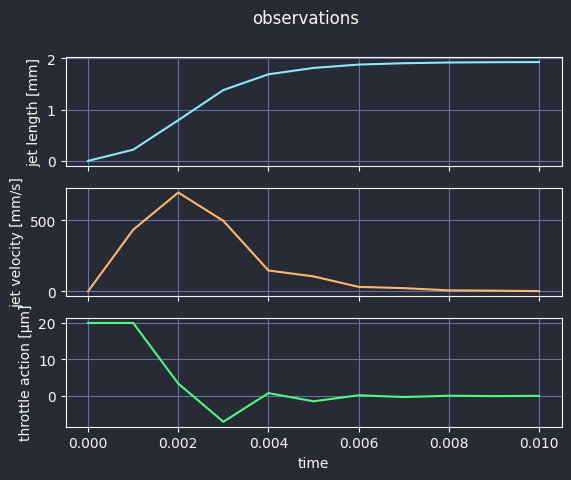

In [6]:
state_trajectory_mpc = callbacks[0].data
observations_mpc = callbacks[-1].data
display(observations_mpc)
callbacks[-1].plot(name="observations"); # Replace plot to own plot function!

# Clean callback
callbacks[0].reset()
callbacks[-1].clear_recent_data()

# Results

Let us get relative objectives and compare them

In [7]:
observations_list = [
    ('pd', observations_pd),
    ('mpc', observations_mpc)
]

results = []

l_crit = system._parameters["l_crit"]

for name, observations in observations_list:
    last_running_objective = observations['running_objective'].iloc[-1]
    last_running_objective /= l_crit**2 # Get value relative to critical jet length
    
    last_value = observations['current_value'].iloc[-1]
    last_value *= 1e3/l_crit**2 # Get value for ms relative to critical jet length
    
    results.append(
        {
            'control': name,
            'last_running_objective': last_running_objective,
            'value': last_value
        }
    )
    
results = pd.DataFrame(results)
print('Results')
display(results)

percentage = (
    (results['value'].iloc[0] - results['value'].iloc[1])
    /results['value'].iloc[0]
)
print(
    f'Thus, value (total cost) was reduced by {percentage*100:.1f}%'
)

Results


,control,last_running_objective,value
0,pd,0.113365,2.859422
1,mpc,0.000001,2.256967


Thus, value (total cost) was reduced by 21.1%


Below you can find experiments of both PD and MPC controller for system with noize

In [8]:
# Update observation noize std
system.update_system_parameters(
    {
        "jet_length_std": 1e-1, # Was 10e-2
        "jet_velocity_std": 10, # Was 2e-2
    }
)

{
    'p_l_gauge': 150000.0,
    'x_th_limits': (0.0, 20.0),
    'freq_th': 500.0,
    'm_p': 0.02,
    'D_th': 0.0002,
    'D_hydr': 0.02,
    'D_work': 0.02,
    'h_work_init': 1000.0,
    'D_exit': 0.00033,
    'l_exit': 0.0085,
    'p_coulomb': 10000.0,
    'eta': 0.7,
    'zeta_th': 5.0,
    'rho_hydr': 1000.0,
    'rho_work': 1000.0,
    'beta_v_hydr': 4.9e-10,
    'beta_v_work': 4.9e-10,
    'sigma_work': 0.073,
    'mu_work': 0.001,
    'v_j': 200.0,
    'jet_length_std': 0.1,
    'jet_velocity_std': 0.02,
    'pressure_std': 0.0,
    'p_atm': 100000.0,
    'g': 9.81,
    'p_l': 250000.0,
    'F_g': 0.1962,
    'A_hydr': 0.0003141592653589793,
    'A_work': 0.0003141592653589793,
    'D_work_exit_2_ratio': 3673.0945821854916,
    'F_coulomb': 3.141592653589793,
    'B_th': 0.04,
    'B_exit': 7.403375106024279,
    'K_hydr': 2040816326.5306125,
    'K_work': 2040816326.5306125,
    'l_crit': 1.9167193623596763,
    'D_drop': 0.6220073077450254
}

## PD-controller for system with noize

In [9]:
pd_policy = PDController(
    system=system,
    sampling_time=SAMPLING_TIME,
    P_coef=20, # Let us set it exactly as maximum action
)

scenario = Scenario(
    policy=pd_policy,
    simulator=simulator,
    sampling_time=SAMPLING_TIME,
    N_episodes=7,
    N_iterations=1,
    running_objective=running_objective,
)

scenario.run()

[11:02:30] INFO     runn. objective: 3.90, state est.: [-0.05 -0.24], observation: [-0.05 -0.24],  ]8;id=896079;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=494928;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [20.], value: 0.0039, time: 0.0000 (0.0%), episode: 1/7, iteration:                    
                    1/1                                                                                            

[11:02:39] INFO     runn. objective: 3.02, state est.: [  0.19 438.25], observation: [  0.19       ]8;id=459898;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=86059;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    438.25], action: [18.03], value: 0.0069, time: 0.0010 (10.0%), episode: 1/7,                   
                    iteration: 1/1                                                                                 

[11:02:50] INFO     runn. objective: 1.32, state est.: [  0.78 646.14], observation: [  0.78       ]8;id=705059;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=934057;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    646.14], action: [11.89], value: 0.0082, time: 0.0020 (20.0%), episode: 1/7,                   
                    iteration: 1/1                                                                                 

[11:03:02] INFO     runn. objective: 0.16, state est.: [  1.52 651.26], observation: [  1.52       ]8;id=404694;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=614639;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    651.26], action: [4.13], value: 0.0084, time: 0.0030 (30.0%), episode: 1/7,                    
                    iteration: 1/1                                                                                 

[11:03:16] INFO     runn. objective: 0.00, state est.: [  1.87 494.07], observation: [  1.87       ]8;id=707074;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=642707;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    494.07], action: [0.53], value: 0.0084, time: 0.0040 (40.0%), episode: 1/7,                    
                    iteration: 1/1                                                                                 

[11:03:29] INFO     runn. objective: 0.17, state est.: [  2.34 298.03], observation: [  2.34       ]8;id=845854;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=221794;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    298.03], action: [-4.45], value: 0.0086, time: 0.0050 (50.0%), episode: 1/7,                   
                    iteration: 1/1                                                                                 

[11:03:44] INFO     runn. objective: 0.46, state est.: [ 2.6  98.28], observation: [ 2.6  98.28],  ]8;id=229673;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=777569;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.17], value: 0.0090, time: 0.0060 (60.0%), episode: 1/7, iteration:                 
                    1/1                                                                                            

[11:04:00] INFO     runn. objective: 0.47, state est.: [2.62 8.79], observation: [2.62 8.79],      ]8;id=229454;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=385857;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.29], value: 0.0095, time: 0.0070 (70.0%), episode: 1/7, iteration:                 
                    1/1                                                                                            

[11:04:18] INFO     runn. objective: 0.57, state est.: [  2.68 -13.74], observation: [  2.68       ]8;id=675511;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=727814;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    -13.74], action: [-7.98], value: 0.0101, time: 0.0080 (80.0%), episode: 1/7,                   
                    iteration: 1/1                                                                                 

[11:04:35] INFO     runn. objective: 0.47, state est.: [2.61 6.36], observation: [2.61 6.36],      ]8;id=662551;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=341274;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.24], value: 0.0105, time: 0.0090 (90.0%), episode: 1/7, iteration:                 
                    1/1                                                                                            

[11:04:56] INFO     runn. objective: 0.41, state est.: [2.57 5.47], observation: [2.57 5.47],      ]8;id=191787;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=100321;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.78], value: 0.0110, time: 0.0100 (100.0%), episode: 1/7,                           
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 4.05, state est.: [-0.09  1.41], observation: [-0.09  1.41],  ]8;id=268879;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=470239;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [20.], value: 0.0041, time: 0.0000 (0.0%), episode: 2/7, iteration:                    
                    1/1                                                                                            

[11:05:18] INFO     runn. objective: 3.27, state est.: [  0.12 422.34], observation: [  0.12       ]8;id=576196;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=292930;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    422.34], action: [18.76], value: 0.0073, time: 0.0010 (10.0%), episode: 2/7,                   
                    iteration: 1/1                                                                                 

[11:05:40] INFO     runn. objective: 1.03, state est.: [  0.91 661.61], observation: [  0.91       ]8;id=532532;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=891799;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    661.61], action: [10.47], value: 0.0083, time: 0.0020 (20.0%), episode: 2/7,                   
                    iteration: 1/1                                                                                 

[11:06:03] INFO     runn. objective: 0.16, state est.: [  1.52 638.11], observation: [  1.52       ]8;id=471797;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=305308;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    638.11], action: [4.13], value: 0.0085, time: 0.0030 (30.0%), episode: 2/7,                    
                    iteration: 1/1                                                                                 

[11:06:28] INFO     runn. objective: 0.02, state est.: [  2.06 477.58], observation: [  2.06       ]8;id=122658;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=382571;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    477.58], action: [-1.54], value: 0.0085, time: 0.0040 (40.0%), episode: 2/7,                   
                    iteration: 1/1                                                                                 

[11:06:53] INFO     runn. objective: 0.17, state est.: [  2.34 250.45], observation: [  2.34       ]8;id=669179;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=95600;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    250.45], action: [-4.37], value: 0.0087, time: 0.0050 (50.0%), episode: 2/7,                   
                    iteration: 1/1                                                                                 

[11:07:20] INFO     runn. objective: 0.19, state est.: [ 2.36 72.3 ], observation: [ 2.36 72.3 ],  ]8;id=617256;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=937929;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-4.63], value: 0.0089, time: 0.0060 (60.0%), episode: 2/7, iteration:                 
                    1/1                                                                                            

[11:07:48] INFO     runn. objective: 0.40, state est.: [ 2.56 -1.99], observation: [ 2.56 -1.99],  ]8;id=716351;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=615400;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.74], value: 0.0093, time: 0.0070 (70.0%), episode: 2/7, iteration:                 
                    1/1                                                                                            

[11:08:17] INFO     runn. objective: 0.47, state est.: [ 2.61 -1.1 ], observation: [ 2.61 -1.1 ],  ]8;id=502454;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=420008;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.26], value: 0.0098, time: 0.0080 (80.0%), episode: 2/7, iteration:                 
                    1/1                                                                                            

[11:08:49] INFO     runn. objective: 0.40, state est.: [ 2.56 11.88], observation: [ 2.56 11.88],  ]8;id=31312;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=932016;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.69], value: 0.0102, time: 0.0090 (90.0%), episode: 2/7, iteration:                 
                    1/1                                                                                            

[11:09:22] INFO     runn. objective: 0.36, state est.: [  2.53 -13.84], observation: [  2.53       ]8;id=464917;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=675227;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    -13.84], action: [-6.36], value: 0.0105, time: 0.0100 (100.0%), episode: 2/7,                  
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 3.75, state est.: [-0.01 -5.04], observation: [-0.01 -5.04],  ]8;id=257305;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=323479;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [20.], value: 0.0037, time: 0.0000 (0.0%), episode: 3/7, iteration:                    
                    1/1                                                                                            

[11:09:57] INFO     runn. objective: 2.77, state est.: [  0.26 443.04], observation: [  0.26       ]8;id=60644;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=635199;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    443.04], action: [17.28], value: 0.0065, time: 0.0010 (10.0%), episode: 3/7,                   
                    iteration: 1/1                                                                                 

[11:10:33] INFO     runn. objective: 1.30, state est.: [  0.79 640.15], observation: [  0.79       ]8;id=377496;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=94558;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    640.15], action: [11.78], value: 0.0078, time: 0.0020 (20.0%), episode: 3/7,                   
                    iteration: 1/1                                                                                 

[11:11:10] INFO     runn. objective: 0.31, state est.: [  1.37 626.39], observation: [  1.37       ]8;id=441755;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=4068;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    626.39], action: [5.75], value: 0.0081, time: 0.0030 (30.0%), episode: 3/7,                    
                    iteration: 1/1                                                                                 

[11:11:51] INFO     runn. objective: 0.00, state est.: [  1.95 522.75], observation: [  1.95       ]8;id=258469;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=181358;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    522.75], action: [-0.36], value: 0.0081, time: 0.0040 (40.0%), episode: 3/7,                   
                    iteration: 1/1                                                                                 

[11:12:41] INFO     runn. objective: 0.13, state est.: [  2.29 302.4 ], observation: [  2.29 302.4 ]8;id=72095;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=884908;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    ], action: [-3.86], value: 0.0083, time: 0.0050 (50.0%), episode: 3/7,                         
                    iteration: 1/1                                                                                 

[11:13:31] INFO     runn. objective: 0.25, state est.: [ 2.43 97.88], observation: [ 2.43 97.88],  ]8;id=688124;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=408605;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-5.32], value: 0.0085, time: 0.0060 (60.0%), episode: 3/7, iteration:                 
                    1/1                                                                                            

[11:14:26] INFO     runn. objective: 0.67, state est.: [ 2.74 32.79], observation: [ 2.74 32.79],  ]8;id=790489;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=234716;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-8.62], value: 0.0092, time: 0.0070 (70.0%), episode: 3/7, iteration:                 
                    1/1                                                                                            

[11:15:16] INFO     runn. objective: 0.24, state est.: [2.42 0.04], observation: [2.42 0.04],      ]8;id=21546;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=330618;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-5.26], value: 0.0094, time: 0.0080 (80.0%), episode: 3/7, iteration:                 
                    1/1                                                                                            

[11:16:05] INFO     runn. objective: 0.49, state est.: [ 2.62 16.04], observation: [ 2.62 16.04],  ]8;id=893498;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=353039;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.39], value: 0.0099, time: 0.0090 (90.0%), episode: 3/7, iteration:                 
                    1/1                                                                                            

[11:16:56] INFO     runn. objective: 0.49, state est.: [ 2.63 -4.44], observation: [ 2.63 -4.44],  ]8;id=375247;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=464515;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.43], value: 0.0104, time: 0.0100 (100.0%), episode: 3/7,                           
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 3.69, state est.: [0.   4.29], observation: [0.   4.29],      ]8;id=557911;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=429558;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [19.95], value: 0.0037, time: 0.0000 (0.0%), episode: 4/7, iteration:                  
                    1/1                                                                                            

[11:17:48] INFO     runn. objective: 3.48, state est.: [  0.06 428.25], observation: [  0.06       ]8;id=388308;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=245957;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    428.25], action: [19.36], value: 0.0072, time: 0.0010 (10.0%), episode: 4/7,                   
                    iteration: 1/1                                                                                 

[11:18:40] INFO     runn. objective: 1.02, state est.: [  0.92 686.14], observation: [  0.92       ]8;id=668397;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=242033;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    686.14], action: [10.41], value: 0.0082, time: 0.0020 (20.0%), episode: 4/7,                   
                    iteration: 1/1                                                                                 

[11:19:35] INFO     runn. objective: 0.28, state est.: [  1.4  645.61], observation: [  1.4        ]8;id=194623;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=109582;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    645.61], action: [5.42], value: 0.0085, time: 0.0030 (30.0%), episode: 4/7,                    
                    iteration: 1/1                                                                                 

[11:20:30] INFO     runn. objective: 0.03, state est.: [  2.1  505.69], observation: [  2.1        ]8;id=134614;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=392225;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    505.69], action: [-1.92], value: 0.0085, time: 0.0040 (40.0%), episode: 4/7,                   
                    iteration: 1/1                                                                                 

[11:21:29] INFO     runn. objective: 0.18, state est.: [  2.35 261.82], observation: [  2.35       ]8;id=761471;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=943907;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    261.82], action: [-4.56], value: 0.0087, time: 0.0050 (50.0%), episode: 4/7,                   
                    iteration: 1/1                                                                                 

[11:22:30] INFO     runn. objective: 0.22, state est.: [ 2.39 53.12], observation: [ 2.39 53.12],  ]8;id=63663;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=385190;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-4.97], value: 0.0089, time: 0.0060 (60.0%), episode: 4/7, iteration:                 
                    1/1                                                                                            

[11:23:33] INFO     runn. objective: 0.46, state est.: [  2.6  -13.64], observation: [  2.6        ]8;id=496389;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=886716;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    -13.64], action: [-7.15], value: 0.0094, time: 0.0070 (70.0%), episode: 4/7,                   
                    iteration: 1/1                                                                                 

[11:24:38] INFO     runn. objective: 0.57, state est.: [2.68 7.59], observation: [2.68 7.59],      ]8;id=617551;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=595746;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.97], value: 0.0099, time: 0.0080 (80.0%), episode: 4/7, iteration:                 
                    1/1                                                                                            

[11:25:45] INFO     runn. objective: 0.29, state est.: [ 2.46 17.95], observation: [ 2.46 17.95],  ]8;id=796243;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=176518;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-5.69], value: 0.0102, time: 0.0090 (90.0%), episode: 4/7, iteration:                 
                    1/1                                                                                            

[11:26:53] INFO     runn. objective: 0.51, state est.: [2.64 9.18], observation: [2.64 9.18],      ]8;id=215676;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=161706;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.58], value: 0.0107, time: 0.0100 (100.0%), episode: 4/7,                           
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 3.18, state est.: [ 0.14 11.77], observation: [ 0.14 11.77],  ]8;id=214389;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=840944;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [18.5], value: 0.0032, time: 0.0000 (0.0%), episode: 5/7, iteration:                   
                    1/1                                                                                            

[11:28:03] INFO     runn. objective: 2.78, state est.: [  0.26 406.46], observation: [  0.26       ]8;id=640107;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=54541;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    406.46], action: [17.29], value: 0.0060, time: 0.0010 (10.0%), episode: 5/7,                   
                    iteration: 1/1                                                                                 

[11:29:14] INFO     runn. objective: 1.21, state est.: [  0.83 609.96], observation: [  0.83       ]8;id=583104;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=504880;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    609.96], action: [11.36], value: 0.0072, time: 0.0020 (20.0%), episode: 5/7,                   
                    iteration: 1/1                                                                                 

[11:30:28] INFO     runn. objective: 0.57, state est.: [  1.17 627.01], observation: [  1.17       ]8;id=371803;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=168551;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    627.01], action: [7.76], value: 0.0077, time: 0.0030 (30.0%), episode: 5/7,                    
                    iteration: 1/1                                                                                 

[11:31:43] INFO     runn. objective: 0.02, state est.: [  1.77 567.65], observation: [  1.77       ]8;id=954649;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=764289;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    567.65], action: [1.53], value: 0.0078, time: 0.0040 (40.0%), episode: 5/7,                    
                    iteration: 1/1                                                                                 

[11:33:00] INFO     runn. objective: 0.19, state est.: [  2.36 365.24], observation: [  2.36       ]8;id=223105;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=741947;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    365.24], action: [-4.67], value: 0.0079, time: 0.0050 (50.0%), episode: 5/7,                   
                    iteration: 1/1                                                                                 

[11:34:18] INFO     runn. objective: 0.66, state est.: [  2.74 122.53], observation: [  2.74       ]8;id=675651;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=521488;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    122.53], action: [-8.59], value: 0.0086, time: 0.0060 (60.0%), episode: 5/7,                   
                    iteration: 1/1                                                                                 

[11:35:37] INFO     runn. objective: 0.70, state est.: [2.77 2.3 ], observation: [2.77 2.3 ],      ]8;id=735869;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=87291;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-8.86], value: 0.0093, time: 0.0070 (70.0%), episode: 5/7, iteration:                 
                    1/1                                                                                            

[11:37:00] INFO     runn. objective: 0.65, state est.: [2.73 7.3 ], observation: [2.73 7.3 ],      ]8;id=608851;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=820741;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-8.49], value: 0.0100, time: 0.0080 (80.0%), episode: 5/7, iteration:                 
                    1/1                                                                                            

[11:38:23] INFO     runn. objective: 0.69, state est.: [ 2.76 10.22], observation: [ 2.76 10.22],  ]8;id=430480;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=854463;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-8.76], value: 0.0106, time: 0.0090 (90.0%), episode: 5/7, iteration:                 
                    1/1                                                                                            

[11:39:46] INFO     runn. objective: 0.56, state est.: [ 2.67 17.53], observation: [ 2.67 17.53],  ]8;id=461141;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=365236;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.88], value: 0.0112, time: 0.0100 (100.0%), episode: 5/7,                           
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 2.88, state est.: [0.23 6.23], observation: [0.23 6.23],      ]8;id=827213;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=700355;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [17.6], value: 0.0029, time: 0.0000 (0.0%), episode: 6/7, iteration:                   
                    1/1                                                                                            

[11:41:08] INFO     runn. objective: 2.85, state est.: [  0.24 373.86], observation: [  0.24       ]8;id=787413;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=315585;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    373.86], action: [17.53], value: 0.0057, time: 0.0010 (10.0%), episode: 6/7,                   
                    iteration: 1/1                                                                                 

[11:42:33] INFO     runn. objective: 1.28, state est.: [  0.79 601.97], observation: [  0.79       ]8;id=645882;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=817533;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    601.97], action: [11.72], value: 0.0070, time: 0.0020 (20.0%), episode: 6/7,                   
                    iteration: 1/1                                                                                 

[11:44:14] INFO     runn. objective: 0.38, state est.: [  1.31 624.42], observation: [  1.31       ]8;id=36522;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=175992;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    624.42], action: [6.36], value: 0.0074, time: 0.0030 (30.0%), episode: 6/7,                    
                    iteration: 1/1                                                                                 

[11:46:09] INFO     runn. objective: 0.00, state est.: [  1.93 541.69], observation: [  1.93       ]8;id=376119;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=460097;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    541.69], action: [-0.17], value: 0.0074, time: 0.0040 (40.0%), episode: 6/7,                   
                    iteration: 1/1                                                                                 

[11:48:05] INFO     runn. objective: 0.09, state est.: [  2.23 298.8 ], observation: [  2.23 298.8 ]8;id=147367;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=645168;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    ], action: [-3.3], value: 0.0075, time: 0.0050 (50.0%), episode: 6/7,                          
                    iteration: 1/1                                                                                 

[11:50:00] INFO     runn. objective: 0.32, state est.: [  2.49 102.52], observation: [  2.49       ]8;id=70403;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=599494;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    102.52], action: [-5.97], value: 0.0078, time: 0.0060 (60.0%), episode: 6/7,                   
                    iteration: 1/1                                                                                 

[11:52:01] INFO     runn. objective: 0.34, state est.: [  2.51 -18.53], observation: [  2.51       ]8;id=340162;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=753889;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    -18.53], action: [-6.21], value: 0.0082, time: 0.0070 (70.0%), episode: 6/7,                   
                    iteration: 1/1                                                                                 

[11:54:02] INFO     runn. objective: 0.51, state est.: [ 2.64 -2.43], observation: [ 2.64 -2.43],  ]8;id=988192;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=179588;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.55], value: 0.0087, time: 0.0080 (80.0%), episode: 6/7, iteration:                 
                    1/1                                                                                            

[11:56:03] INFO     runn. objective: 0.15, state est.: [  2.32 -12.49], observation: [  2.32       ]8;id=24288;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=853166;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    -12.49], action: [-4.16], value: 0.0088, time: 0.0090 (90.0%), episode: 6/7,                   
                    iteration: 1/1                                                                                 

[11:58:13] INFO     runn. objective: 0.41, state est.: [2.57 0.88], observation: [2.57 0.88],      ]8;id=781593;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=45096;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-6.8], value: 0.0092, time: 0.0100 (100.0%), episode: 6/7, iteration:                 
                    1/1                                                                                            

[11:58:14] INFO     runn. objective: 3.08, state est.: [ 0.17 17.84], observation: [ 0.17 17.84],  ]8;id=815838;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=638239;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [18.22], value: 0.0031, time: 0.0000 (0.0%), episode: 7/7, iteration:                  
                    1/1                                                                                            

[12:00:20] INFO     runn. objective: 2.89, state est.: [  0.23 409.36], observation: [  0.23       ]8;id=433536;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=126254;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    409.36], action: [17.63], value: 0.0060, time: 0.0010 (10.0%), episode: 7/7,                   
                    iteration: 1/1                                                                                 

[12:02:26] INFO     runn. objective: 1.22, state est.: [  0.82 617.96], observation: [  0.82       ]8;id=558063;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=724746;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    617.96], action: [11.4], value: 0.0072, time: 0.0020 (20.0%), episode: 7/7,                    
                    iteration: 1/1                                                                                 

[12:04:35] INFO     runn. objective: 0.34, state est.: [  1.34 611.42], observation: [  1.34       ]8;id=18691;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=656339;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    611.42], action: [5.99], value: 0.0075, time: 0.0030 (30.0%), episode: 7/7,                    
                    iteration: 1/1                                                                                 

[12:06:54] INFO     runn. objective: 0.02, state est.: [  1.79 501.63], observation: [  1.79       ]8;id=914060;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=603123;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    501.63], action: [1.32], value: 0.0075, time: 0.0040 (40.0%), episode: 7/7,                    
                    iteration: 1/1                                                                                 

[12:09:15] INFO     runn. objective: 0.13, state est.: [  2.29 330.77], observation: [  2.29       ]8;id=222213;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=417464;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    330.77], action: [-3.85], value: 0.0077, time: 0.0050 (50.0%), episode: 7/7,                   
                    iteration: 1/1                                                                                 

[12:11:36] INFO     runn. objective: 0.68, state est.: [  2.75 123.43], observation: [  2.75       ]8;id=149505;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=815121;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    123.43], action: [-8.69], value: 0.0084, time: 0.0060 (60.0%), episode: 7/7,                   
                    iteration: 1/1                                                                                 

[12:13:58] INFO     runn. objective: 0.46, state est.: [2.6  0.13], observation: [2.6  0.13],      ]8;id=389131;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=797063;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.16], value: 0.0088, time: 0.0070 (70.0%), episode: 7/7, iteration:                 
                    1/1                                                                                            

[12:16:18] INFO     runn. objective: 0.45, state est.: [ 2.6  -3.01], observation: [ 2.6  -3.01],  ]8;id=634235;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=675505;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [-7.08], value: 0.0093, time: 0.0080 (80.0%), episode: 7/7, iteration:                 
                    1/1                                                                                            

[12:18:32] INFO     runn. objective: 0.36, state est.: [  2.53 -11.05], observation: [  2.53       ]8;id=492293;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=568912;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    -11.05], action: [-6.37], value: 0.0096, time: 0.0090 (90.0%), episode: 7/7,                   
                    iteration: 1/1                                                                                 

[12:20:51] INFO     runn. objective: 0.22, state est.: [  2.39 -12.93], observation: [  2.39       ]8;id=571494;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=204151;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    -12.93], action: [-4.94], value: 0.0098, time: 0.0100 (100.0%), episode: 7/7,                  
                    iteration: 1/1                                                                                 

In [12]:
state_trajectory_pd_noize = callbacks[0].data
observations_pd_noize = callbacks[-1].data.iloc[:,:-2]
display(observations_pd_noize)
callbacks[-1].plot(name="observations"); # Replace plot to own plot function!

# Clean callback
callbacks[0].reset()
callbacks[-1].clear_recent_data()

""


KeyError: "None of [Index(['jet length [mm]', 'jet velocity [mm/s]', 'throttle action [µm]',\n       'time'],\n      dtype='object')] are in the [columns]"

In [11]:
observations_pd_noize.to_csv('observations_pd_noize.csv')

In [14]:
observations_pd_noize = pd.read_csv('observations_pd_noize.csv')

In [15]:
observations_pd_noize 

,Unnamed: 0,time,running_objective,current_value,episode_id,iteration_id,throttle action [µm],jet length [mm],jet velocity [mm/s]
0,0,0.000000,3.896004,0.003896,1,1,20.000000,-0.047527,-0.235031
1,1,0.001000,3.017892,0.006914,1,1,18.026891,0.189095,438.247559
2,2,0.002000,1.320405,0.008234,1,1,11.890163,0.777214,646.135672
3,3,0.003000,0.164638,0.008399,1,1,4.133867,1.520546,651.263716
4,4,0.004000,0.003674,0.008403,1,1,0.532473,1.865689,494.067753
...,...,...,...,...,...,...,...,...,...
72,72,0.006000,0.678473,0.008354,7,1,-8.694837,2.749998,123.432057
73,73,0.007000,0.458085,0.008812,7,1,-7.162272,2.603123,0.132029
74,74,0.008000,0.447988,0.009260,7,1,-7.084007,2.595622,-3.013725
75,75,0.009000,0.361328,0.009622,7,1,-6.372234,2.527409,-11.053835


## Model Predictive Control (MPC) for system with noize

In [3]:
PREDICTION_HORIZON = 5
ACTION_SIZE = 1
PREDICTION_STEP_SIZE = 1 * SAMPLING_TIME

model = ModelWeightContainer(
    dim_output=ACTION_SIZE, 
    weights_init=rg.zeros(
        (PREDICTION_HORIZON + 1, ACTION_SIZE), 
        rc_type=rg.CASADI
    )
)  # A trivial model contains our predicted actions
# System for the predictor
system_model = StationaryHydraulicSystem(
    init_state=initial_state
)
observer = StationaryHydraulicObserver(
    system=system_model
)
predictor = EulerPredictor(
    system=system_model, 
    pred_step_size=PREDICTION_STEP_SIZE
)  # Predictor is used for MPC-prediction

# Update observation noize std
system.update_system_parameters(
    {
        "jet_length_std": 1e-1, # Was 10e-2
        "jet_velocity_std": 10, # Was 2e-2
    }
)

system_model.update_system_parameters(
    {
        "jet_length_std": 1e-1, # Was 10e-2
        "jet_velocity_std": 10, # Was 2e-2
    }
)

policy_mpc = MPC(
    model=model,
    system=system_model,
    action_bounds=system_model.action_bounds,
    optimizer_config=CasadiOptimizerConfig(),
    prediction_horizon=PREDICTION_HORIZON,
    running_objective=running_objective,
    predictor=predictor
)

scenario = RLScenario(
    policy=policy_mpc,
    observer = observer,
    critic=CriticTrivial(),  # mocked critic
    running_objective=running_objective,
    policy_optimization_event=Event.compute_action,  # run policy optimization on each step
    discount_factor=1.0,
    sampling_time=SAMPLING_TIME,
    simulator=simulator,
    N_episodes=7,
    N_iterations=1,
)

scenario.run()


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



[03:32:45] INFO     runn. objective: 3.71, state est.: [1000.    0.    0.], observation: [0. 0.],  ]8;id=969570;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=768445;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    action: [20.], value: 0.0037, time: 0.0000 (0.0%), episode: 1/7, iteration:                    
                    1/1                                                                                            

[03:32:57] INFO     runn. objective: 2.54, state est.: [1000.09  115.71    7.72], observation: [   ]8;id=801251;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=11993;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.33 425.03], action: [20.], value: 0.0063, time: 0.0010 (10.0%), episode:                     
                    1/7, iteration: 1/1                                                                            

[03:33:10] INFO     runn. objective: 1.24, state est.: [1000.22  196.18   13.11], observation: [   ]8;id=641837;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=946367;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.81 720.6 ], action: [1.09], value: 0.0075, time: 0.0020 (20.0%), episode:                    
                    1/7, iteration: 1/1                                                                            

[03:33:24] INFO     runn. objective: 0.43, state est.: [1000.35  122.08    8.15], observation: [   ]8;id=406189;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=545368;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.27 448.43], action: [-0.51], value: 0.0079, time: 0.0030 (30.0%), episode:                   
                    1/7, iteration: 1/1                                                                            

[03:33:39] INFO     runn. objective: 0.09, state est.: [1000.45   71.03    4.74], observation: [   ]8;id=768579;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=650191;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.63 260.9 ], action: [-3.62], value: 0.0080, time: 0.0040 (40.0%), episode:                   
                    1/7, iteration: 1/1                                                                            

[03:33:56] INFO     runn. objective: 0.10, state est.: [1000.44   23.34    1.56], observation: [   ]8;id=608987;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=395931;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.61 85.75], action: [6.84], value: 0.0081, time: 0.0050 (50.0%), episode:                     
                    1/7, iteration: 1/1                                                                            

[03:34:15] INFO     runn. objective: 0.01, state est.: [1000.49   53.32    3.56], observation: [   ]8;id=685459;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=371765;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.81 195.83], action: [-5.04], value: 0.0081, time: 0.0060 (60.0%), episode:                   
                    1/7, iteration: 1/1                                                                            

[03:34:34] INFO     runn. objective: 0.05, state est.: [1000.58    7.52    0.5 ], observation: [   ]8;id=683507;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=480170;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    2.15 27.61], action: [-0.59], value: 0.0082, time: 0.0070 (70.0%), episode:                    
                    1/7, iteration: 1/1                                                                            

[03:34:54] INFO     runn. objective: 0.07, state est.: [1000.6     1.59    0.11], observation:     ]8;id=435017;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=893495;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [2.2  5.84], action: [-0.75], value: 0.0082, time: 0.0080 (80.0%), episode:                    
                    1/7, iteration: 1/1                                                                            

[03:35:15] INFO     runn. objective: 0.01, state est.: [1000.56   -4.12   -0.26], observation: [   ]8;id=917379;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=395898;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    2.05 -15.12], action: [-0.], value: 0.0083, time: 0.0090 (90.0%), episode:                     
                    1/7, iteration: 1/1                                                                            

[03:35:38] INFO     runn. objective: 0.02, state est.: [1000.56    2.03    0.14], observation:     ]8;id=981206;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=225627;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [2.07 7.46], action: [-0.41], value: 0.0083, time: 0.0100 (100.0%), episode:                   
                    1/7, iteration: 1/1                                                                            

           INFO     runn. objective: 3.30, state est.: [1000.03    1.02    0.07], observation:     ]8;id=787135;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=144463;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [0.11 3.75], action: [20.], value: 0.0033, time: 0.0000 (0.0%), episode: 2/7,                  
                    iteration: 1/1                                                                                 

[03:36:04] INFO     runn. objective: 2.96, state est.: [1000.06  119.34    7.96], observation: [   ]8;id=283820;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=220486;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.21 438.34], action: [20.], value: 0.0063, time: 0.0010 (10.0%), episode:                     
                    2/7, iteration: 1/1                                                                            

[03:36:32] INFO     runn. objective: 1.54, state est.: [1000.19  190.81   12.75], observation: [   ]8;id=367013;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=544993;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.69 700.85], action: [6.88], value: 0.0078, time: 0.0020 (20.0%), episode:                    
                    2/7, iteration: 1/1                                                                            

[03:37:12] INFO     runn. objective: 0.28, state est.: [1000.38  159.7    10.66], observation: [   ]8;id=745058;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=812566;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.4  586.59], action: [-11.98], value: 0.0081, time: 0.0030 (30.0%), episode:                  
                    2/7, iteration: 1/1                                                                            

[03:37:50] INFO     runn. objective: 0.03, state est.: [1000.48   27.07    1.8 ], observation: [   ]8;id=871698;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=606620;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.75 99.42], action: [1.], value: 0.0081, time: 0.0040 (40.0%), episode: 2/7,                  
                    iteration: 1/1                                                                                 

[03:38:22] INFO     runn. objective: 0.08, state est.: [1000.45   22.28    1.49], observation: [   ]8;id=437768;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=685737;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.65 81.83], action: [5.7], value: 0.0082, time: 0.0050 (50.0%), episode: 2/7,                 
                    iteration: 1/1                                                                                 

[03:38:58] INFO     runn. objective: 0.01, state est.: [1000.5    43.64    2.91], observation: [   ]8;id=178240;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=256950;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.85 160.31], action: [-2.91], value: 0.0082, time: 0.0060 (60.0%), episode:                   
                    2/7, iteration: 1/1                                                                            

[03:39:40] INFO     runn. objective: 0.00, state est.: [1000.53   11.22    0.75], observation: [   ]8;id=666402;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=968028;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.96 41.2 ], action: [-1.7], value: 0.0082, time: 0.0070 (70.0%), episode:                     
                    2/7, iteration: 1/1                                                                            

[03:40:29] INFO     runn. objective: 0.00, state est.: [1000.53   -2.05   -0.13], observation: [   ]8;id=416979;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=129370;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.95 -7.54], action: [-0.], value: 0.0082, time: 0.0080 (80.0%), episode: 2/7,                 
                    iteration: 1/1                                                                                 

[03:41:21] INFO     runn. objective: 0.00, state est.: [1000.54   -2.29   -0.14], observation: [   ]8;id=816773;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=526384;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.97 -8.41], action: [-0.], value: 0.0082, time: 0.0090 (90.0%), episode: 2/7,                 
                    iteration: 1/1                                                                                 

[03:42:14] INFO     runn. objective: 0.00, state est.: [1000.53   -3.12   -0.19], observation: [   ]8;id=283316;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=465483;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.94 -11.45], action: [-0.], value: 0.0082, time: 0.0100 (100.0%), episode:                    
                    2/7, iteration: 1/1                                                                            

           INFO     runn. objective: 3.98, state est.: [999.98  -1.99  -0.12], observation: [-0.07 ]8;id=624377;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=768040;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    -7.3 ], action: [0.01], value: 0.0040, time: 0.0000 (0.0%), episode: 3/7,                      
                    iteration: 1/1                                                                                 

[03:43:07] INFO     runn. objective: 4.10, state est.: [999.97  -1.48  -0.09], observation: [-0.1  ]8;id=922302;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=509536;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    -5.42], action: [0.01], value: 0.0081, time: 0.0010 (10.0%), episode: 3/7,                     
                    iteration: 1/1                                                                                 

[03:44:04] INFO     runn. objective: 3.92, state est.: [999.99  -1.79  -0.11], observation: [-0.05 ]8;id=371207;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=556134;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    -6.59], action: [0.01], value: 0.0120, time: 0.0020 (20.0%), episode: 3/7,                     
                    iteration: 1/1                                                                                 

[03:45:01] INFO     runn. objective: 3.79, state est.: [999.99   2.36   0.16], observation: [-0.02 ]8;id=306611;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=230490;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    8.67], action: [20.], value: 0.0158, time: 0.0030 (30.0%), episode: 3/7,                       
                    iteration: 1/1                                                                                 

[03:45:56] INFO     runn. objective: 3.15, state est.: [1000.04  120.67    8.05], observation: [   ]8;id=544726;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=146859;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.15 443.22], action: [20.], value: 0.0189, time: 0.0040 (40.0%), episode:                     
                    3/7, iteration: 1/1                                                                            

[03:46:51] INFO     runn. objective: 1.44, state est.: [1000.2   188.99   12.63], observation: [   ]8;id=653552;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=387142;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.73 694.18], action: [5.78], value: 0.0204, time: 0.0050 (50.0%), episode:                    
                    3/7, iteration: 1/1                                                                            

[03:47:48] INFO     runn. objective: 0.15, state est.: [1000.42  153.74   10.27], observation: [   ]8;id=571907;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=914326;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.54 564.71], action: [-11.32], value: 0.0205, time: 0.0060 (60.0%), episode:                  
                    3/7, iteration: 1/1                                                                            

[03:48:48] INFO     runn. objective: 0.20, state est.: [1000.4    26.08    1.74], observation: [   ]8;id=601596;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=92435;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.48 95.79], action: [11.11], value: 0.0207, time: 0.0070 (70.0%), episode:                    
                    3/7, iteration: 1/1                                                                            

[03:49:48] INFO     runn. objective: 0.01, state est.: [1000.5    77.79    5.19], observation: [   ]8;id=887767;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=543668;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.85 285.73], action: [-12.83], value: 0.0207, time: 0.0080 (80.0%), episode:                  
                    3/7, iteration: 1/1                                                                            

[03:50:40] INFO     runn. objective: 0.00, state est.: [1000.52    1.86    0.12], observation:     ]8;id=857420;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=565492;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.92 6.84], action: [-0.05], value: 0.0207, time: 0.0090 (90.0%), episode:                    
                    3/7, iteration: 1/1                                                                            

[03:51:49] INFO     runn. objective: 0.04, state est.: [1000.58    0.22    0.01], observation:     ]8;id=502586;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=916751;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [2.14 0.81], action: [-0.45], value: 0.0208, time: 0.0100 (100.0%), episode:                   
                    3/7, iteration: 1/1                                                                            

           INFO     runn. objective: 3.62, state est.: [1000.01    0.12    0.01], observation:     ]8;id=890931;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=974071;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [0.02 0.43], action: [20.], value: 0.0036, time: 0.0000 (0.0%), episode: 4/7,                  
                    iteration: 1/1                                                                                 

[03:52:58] INFO     runn. objective: 2.97, state est.: [1000.06  119.41    7.97], observation: [   ]8;id=819423;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=511963;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.2  438.59], action: [20.], value: 0.0066, time: 0.0010 (10.0%), episode:                     
                    4/7, iteration: 1/1                                                                            

[03:54:10] INFO     runn. objective: 1.27, state est.: [1000.22  192.73   12.88], observation: [   ]8;id=760770;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=763947;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.8  707.91], action: [2.34], value: 0.0079, time: 0.0020 (20.0%), episode:                    
                    4/7, iteration: 1/1                                                                            

[03:55:21] INFO     runn. objective: 0.32, state est.: [1000.37  123.31    8.23], observation: [   ]8;id=367219;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=629029;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.36 452.91], action: [-4.25], value: 0.0082, time: 0.0030 (30.0%), episode:                   
                    4/7, iteration: 1/1                                                                            

[03:56:33] INFO     runn. objective: 0.03, state est.: [1000.48   56.19    3.75], observation: [   ]8;id=42916;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=12128;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.76 206.4 ], action: [-4.12], value: 0.0082, time: 0.0040 (40.0%), episode:                   
                    4/7, iteration: 1/1                                                                            

[03:57:48] INFO     runn. objective: 0.00, state est.: [1000.53    5.52    0.37], observation: [   ]8;id=516078;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=162117;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.93 20.27], action: [-0.68], value: 0.0082, time: 0.0050 (50.0%), episode:                    
                    4/7, iteration: 1/1                                                                            

[03:59:04] INFO     runn. objective: 0.03, state est.: [1000.48    0.03    0.  ], observation:     ]8;id=520888;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=953702;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.76 0.1 ], action: [5.97], value: 0.0082, time: 0.0060 (60.0%), episode:                     
                    4/7, iteration: 1/1                                                                            

[04:00:25] INFO     runn. objective: 0.00, state est.: [1000.51   36.52    2.43], observation: [   ]8;id=149785;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=828301;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.89 134.14], action: [-2.7], value: 0.0082, time: 0.0070 (70.0%), episode:                    
                    4/7, iteration: 1/1                                                                            

[04:01:46] INFO     runn. objective: 0.00, state est.: [1000.54    3.39    0.23], observation: [   ]8;id=795996;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=194016;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.97 12.47], action: [-1.53], value: 0.0082, time: 0.0080 (80.0%), episode:                    
                    4/7, iteration: 1/1                                                                            

[04:03:09] INFO     runn. objective: 0.01, state est.: [1000.54    2.12    0.14], observation: [2. ]8;id=905046;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=566610;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    7.79], action: [-0.22], value: 0.0082, time: 0.0090 (90.0%), episode: 4/7,                     
                    iteration: 1/1                                                                                 

[04:04:31] INFO     runn. objective: 0.00, state est.: [1000.54    0.38    0.03], observation:     ]8;id=405721;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=667257;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.97 1.39], action: [-0.11], value: 0.0082, time: 0.0100 (100.0%), episode:                   
                    4/7, iteration: 1/1                                                                            

           INFO     runn. objective: 3.64, state est.: [1000.     -0.47   -0.03], observation: [   ]8;id=757559;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=805501;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.02 -1.72], action: [20.], value: 0.0036, time: 0.0000 (0.0%), episode: 5/7,                  
                    iteration: 1/1                                                                                 

[04:06:02] INFO     runn. objective: 2.67, state est.: [1000.08  118.22    7.89], observation: [   ]8;id=149129;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=235311;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.29 434.24], action: [20.], value: 0.0063, time: 0.0010 (10.0%), episode:                     
                    5/7, iteration: 1/1                                                                            

[04:07:39] INFO     runn. objective: 1.16, state est.: [1000.23  190.4    12.72], observation: [   ]8;id=633085;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=933451;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.85 699.36], action: [0.99], value: 0.0075, time: 0.0020 (20.0%), episode:                    
                    5/7, iteration: 1/1                                                                            

[04:09:16] INFO     runn. objective: 0.31, state est.: [1000.37  119.97    8.01], observation: [   ]8;id=784219;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=617930;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.37 440.66], action: [-3.85], value: 0.0078, time: 0.0030 (30.0%), episode:                   
                    5/7, iteration: 1/1                                                                            

[04:10:56] INFO     runn. objective: 0.09, state est.: [1000.44   53.83    3.59], observation: [   ]8;id=992741;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=328527;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.63 197.73], action: [0.1], value: 0.0079, time: 0.0040 (40.0%), episode:                     
                    5/7, iteration: 1/1                                                                            

[04:12:38] INFO     runn. objective: 0.00, state est.: [1000.52   33.7     2.25], observation: [   ]8;id=302676;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=409563;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.91 123.79], action: [-2.63], value: 0.0079, time: 0.0050 (50.0%), episode:                   
                    5/7, iteration: 1/1                                                                            

[04:14:19] INFO     runn. objective: 0.00, state est.: [1000.51    2.2     0.15], observation:     ]8;id=82199;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=767357;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.88 8.09], action: [1.24], value: 0.0079, time: 0.0060 (60.0%), episode:                     
                    5/7, iteration: 1/1                                                                            

[04:16:05] INFO     runn. objective: 0.03, state est.: [1000.48    9.69    0.65], observation: [   ]8;id=757462;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=310058;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.77 35.58], action: [3.9], value: 0.0079, time: 0.0070 (70.0%), episode: 5/7,                 
                    iteration: 1/1                                                                                 

[04:17:54] INFO     runn. objective: 0.00, state est.: [1000.51   28.86    1.92], observation: [   ]8;id=825261;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=41814;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.86 106.01], action: [-3.18], value: 0.0079, time: 0.0080 (80.0%), episode:                   
                    5/7, iteration: 1/1                                                                            

[04:19:43] INFO     runn. objective: 0.01, state est.: [1000.56    2.74    0.18], observation: [   ]8;id=343815;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=723960;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    2.04 10.05], action: [-0.34], value: 0.0079, time: 0.0090 (90.0%), episode:                    
                    5/7, iteration: 1/1                                                                            

[04:21:29] INFO     runn. objective: 0.00, state est.: [1000.53   -0.05   -0.  ], observation: [   ]8;id=259591;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=695925;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.95 -0.18], action: [-0.], value: 0.0079, time: 0.0100 (100.0%), episode:                     
                    5/7, iteration: 1/1                                                                            

           INFO     runn. objective: 4.15, state est.: [999.97  -1.97  -0.12], observation: [-0.11 ]8;id=321038;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=165357;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    -7.25], action: [0.01], value: 0.0041, time: 0.0000 (0.0%), episode: 6/7,                      
                    iteration: 1/1                                                                                 

[04:23:20] INFO     runn. objective: 3.54, state est.: [1000.01    0.29    0.02], observation:     ]8;id=255968;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=390919;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [0.04 1.07], action: [20.], value: 0.0077, time: 0.0010 (10.0%), episode: 6/7,                 
                    iteration: 1/1                                                                                 

[04:25:13] INFO     runn. objective: 3.18, state est.: [1000.04  117.87    7.87], observation: [   ]8;id=12135;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=592607;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.14 432.96], action: [20.], value: 0.0109, time: 0.0020 (20.0%), episode:                     
                    6/7, iteration: 1/1                                                                            

[04:27:07] INFO     runn. objective: 1.11, state est.: [1000.24  187.53   12.53], observation: [   ]8;id=809196;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=650590;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.87 688.83], action: [0.64], value: 0.0120, time: 0.0030 (30.0%), episode:                    
                    6/7, iteration: 1/1                                                                            

[04:29:05] INFO     runn. objective: 0.20, state est.: [1000.4   117.94    7.87], observation: [   ]8;id=254077;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=470959;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.48 433.19], action: [-7.34], value: 0.0122, time: 0.0040 (40.0%), episode:                   
                    6/7, iteration: 1/1                                                                            

[04:31:07] INFO     runn. objective: 0.20, state est.: [1000.4    24.1     1.61], observation: [   ]8;id=674624;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=175677;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.48 88.54], action: [11.39], value: 0.0124, time: 0.0050 (50.0%), episode:                    
                    6/7, iteration: 1/1                                                                            

[04:33:11] INFO     runn. objective: 0.02, state est.: [1000.49   83.1     5.54], observation: [   ]8;id=891967;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=694234;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.8  305.23], action: [-9.03], value: 0.0124, time: 0.0060 (60.0%), episode:                   
                    6/7, iteration: 1/1                                                                            

[04:35:17] INFO     runn. objective: 0.00, state est.: [1000.51    3.19    0.21], observation: [   ]8;id=375180;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=154461;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.88 11.73], action: [1.17], value: 0.0124, time: 0.0070 (70.0%), episode:                     
                    6/7, iteration: 1/1                                                                            

[04:37:25] INFO     runn. objective: 0.03, state est.: [1000.57    4.33    0.29], observation: [   ]8;id=798073;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=827704;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    2.1 15.9], action: [-0.44], value: 0.0124, time: 0.0080 (80.0%), episode: 6/7,                 
                    iteration: 1/1                                                                                 

[04:39:33] INFO     runn. objective: 0.02, state est.: [1000.57   -2.51   -0.16], observation: [   ]8;id=810849;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=658718;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    2.08 -9.23], action: [-0.], value: 0.0124, time: 0.0090 (90.0%), episode: 6/7,                 
                    iteration: 1/1                                                                                 

[04:41:47] INFO     runn. objective: 0.00, state est.: [1000.52   -1.39   -0.09], observation: [   ]8;id=936819;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=209897;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.91 -5.1 ], action: [0.], value: 0.0124, time: 0.0100 (100.0%), episode: 6/7,                 
                    iteration: 1/1                                                                                 

           INFO     runn. objective: 3.51, state est.: [1000.01    2.65    0.18], observation:     ]8;id=765908;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=456077;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [0.05 9.74], action: [20.], value: 0.0035, time: 0.0000 (0.0%), episode: 7/7,                  
                    iteration: 1/1                                                                                 

[04:44:00] INFO     runn. objective: 2.91, state est.: [1000.06  119.03    7.94], observation: [   ]8;id=583304;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=39227;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.22 437.21], action: [20.], value: 0.0064, time: 0.0010 (10.0%), episode:                     
                    7/7, iteration: 1/1                                                                            

[04:46:15] INFO     runn. objective: 1.49, state est.: [1000.19  189.36   12.65], observation: [   ]8;id=900328;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=35340;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    0.7  695.52], action: [6.46], value: 0.0079, time: 0.0020 (20.0%), episode:                    
                    7/7, iteration: 1/1                                                                            

[04:48:32] INFO     runn. objective: 0.27, state est.: [1000.38  154.18   10.29], observation: [   ]8;id=845626;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=277833;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.4  566.31], action: [-11.19], value: 0.0082, time: 0.0030 (30.0%), episode:                  
                    7/7, iteration: 1/1                                                                            

[04:50:51] INFO     runn. objective: 0.13, state est.: [1000.43   28.69    1.91], observation: [   ]8;id=271957;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=920098;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.56 105.4 ], action: [7.39], value: 0.0083, time: 0.0040 (40.0%), episode:                    
                    7/7, iteration: 1/1                                                                            

[04:53:12] INFO     runn. objective: 0.04, state est.: [1000.47   62.15    4.14], observation: [   ]8;id=61978;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=593712;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.73 228.29], action: [-4.17], value: 0.0084, time: 0.0050 (50.0%), episode:                   
                    7/7, iteration: 1/1                                                                            

[04:55:34] INFO     runn. objective: 0.00, state est.: [1000.53   13.49    0.9 ], observation: [   ]8;id=475504;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=899245;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.96 49.56], action: [-1.99], value: 0.0084, time: 0.0060 (60.0%), episode:                    
                    7/7, iteration: 1/1                                                                            

[04:57:57] INFO     runn. objective: 0.01, state est.: [1000.5    -5.7    -0.36], observation: [   ]8;id=815488;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=436203;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    1.83 -20.94], action: [0.], value: 0.0084, time: 0.0070 (70.0%), episode: 7/7,                 
                    iteration: 1/1                                                                                 

[05:00:14] INFO     runn. objective: 0.00, state est.: [1000.52    0.42    0.03], observation:     ]8;id=299488;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=678114;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    [1.9  1.55], action: [0.8], value: 0.0084, time: 0.0080 (80.0%), episode: 7/7,                 
                    iteration: 1/1                                                                                 

[05:02:31] INFO     runn. objective: 0.04, state est.: [1000.58   -0.     -0.  ], observation: [   ]8;id=147612;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=719957;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    2.11 -0.01], action: [-0.], value: 0.0084, time: 0.0090 (90.0%), episode: 7/7,                 
                    iteration: 1/1                                                                                 

[05:04:48] INFO     runn. objective: 0.01, state est.: [1000.55    3.59    0.24], observation: [   ]8;id=218345;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py\callback.py]8;;\:]8;id=244924;file:///home/kalexu/.pyenv/versions/3.11.8/lib/python3.11/site-packages/regelum/callback.py#1110\1110]8;;\
                    2.03 13.18], action: [-0.33], value: 0.0084, time: 0.0100 (100.0%), episode:                   
                    7/7, iteration: 1/1                                                                            

,time,running_objective,current_value,episode_id,iteration_id,throttle action [µm],jet length [mm],jet velocity [mm/s],piston position [µm],piston velocity [µm/s],throttle position [µm]
0,0.000000,3.710643,0.003711,1,1,20.000000,0.000000,0.000000,1000.000000,0.000000,0.000000
1,0.001000,2.541000,0.006252,1,1,20.000000,0.332251,425.031196,1000.090455,115.714743,7.721039
2,0.002000,1.235463,0.007487,1,1,1.088889,0.814789,720.600945,1000.221826,196.183607,13.111707
3,0.003000,0.433897,0.007921,1,1,-0.512019,1.267595,448.427478,1000.345103,122.084381,8.146853
4,0.004000,0.085011,0.008006,1,1,-3.623820,1.634736,260.902620,1000.445057,71.030738,4.736941
...,...,...,...,...,...,...,...,...,...,...,...
72,0.006000,0.001484,0.008359,7,1,-1.993398,1.964828,49.560085,1000.534924,13.492733,0.899528
73,0.007000,0.008577,0.008368,7,1,0.000367,1.833692,-20.944746,1000.499223,-5.702207,-0.355695
74,0.008000,0.000598,0.008369,7,1,0.803229,1.901844,1.554525,1000.517777,0.423219,0.028215
75,0.009000,0.035316,0.008404,7,1,-0.000744,2.114229,-0.008084,1000.575599,-0.002201,-0.000137


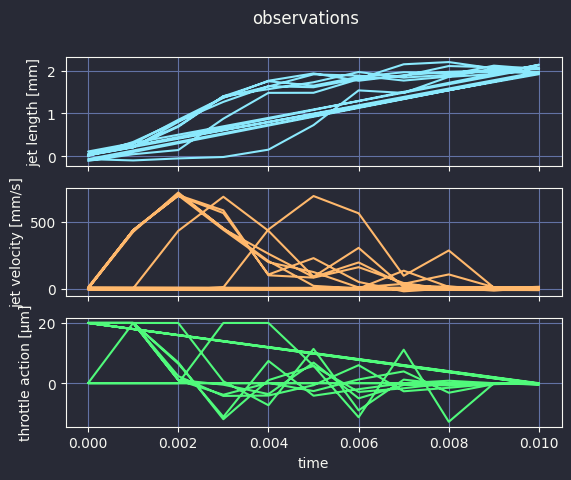

In [5]:
state_trajectory_mpc_noize = callbacks[0].data
observations_mpc_noize = callbacks[-1].data
display(observations_mpc_noize)
callbacks[-1].plot(name="observations"); # Replace plot to own plot function!

# Clean callback
callbacks[0].reset()
callbacks[-1].clear_recent_data()

In [8]:
observations_mpc_noize.to_csv('observations_mpc_noize')

# Results

In [16]:
import numpy as np

observations_list = [
    # ('pd', observations_pd),
    ('pd_noize', observations_pd_noize),
    ('mpc_noize', observations_mpc_noize)
]

results = []

l_crit = system._parameters["l_crit"]

for name, observations in observations_list:
    
    run_obj_array = []
    max_val_array = []
    for class_index, group in observations.groupby('episode_id'):
        run_obj_array.append(group['running_objective'].iloc[-1])
        max_val_array.append(group['current_value'].iloc[-1])
        
    run_obj_array = np.array(run_obj_array)/(l_crit**2)
    max_val_array = np.array(max_val_array)*(1e3/l_crit**2)

    results.append(
        {
            'control': name,
            'last_running_objective_mean': np.mean(run_obj_array),
            'last_running_objective_std': np.std(run_obj_array),
            'value_mean': np.mean(max_val_array),
            'value_std': np.std(max_val_array),
        })

results = pd.DataFrame(results)
print('Results')
display(results)


Results


,control,last_running_objective_mean,last_running_objective_std,value_mean,value_std
0,pd_noize,0.115178,0.028831,2.833333,0.171095
1,mpc_noize,0.003065,0.004101,2.888342,1.198830
